# Data visualization

In [62]:
import numpy as np, pandas as pd

In [63]:
input_test='./aozora_datasets_min/test_author_novel.csv'
input_train='./aozora_datasets_min/train_author_novel.csv'
df_train = pd.read_csv(input_train)
df_train

,author_id,author_name,novel_id,novel_title,filename
0,162,若山 牧水,885,秋草と虫の音,885.txt
1,162,若山 牧水,2208,鮎釣に過した夏休み,2208.txt
2,162,若山 牧水,4393,一家,4393.txt
3,162,若山 牧水,2204,鴉と正覚坊,2204.txt
4,162,若山 牧水,43507,熊野奈智山,43507.txt
...,...,...,...,...,...
1584,153,石川 啄木,48150,無名会の一夕,48150.txt
1585,153,石川 啄木,49679,弓町より,49679.txt
1586,153,石川 啄木,818,弓町より,818.txt
1587,153,石川 啄木,47892,呼子と口笛,47892.txt


In [64]:
df_test = pd.read_csv(input_test)
df_test

,novel_id,filename
0,2198,2198.txt
1,2213,2213.txt
2,2627,2627.txt
3,2618,2618.txt
4,2621,2621.txt
...,...,...
527,48367,48367.txt
528,48163,48163.txt
529,48151,48151.txt
530,48152,48152.txt


In [9]:
import matplotlib
matplotlib.__version__

'3.1.2'

In [10]:
# check number of text files
import glob
train_files = glob.glob('./aozora_datasets_min/train_datasets/*.txt')
test_files = glob.glob('./aozora_datasets_min/test_datasets/*.txt')

print(len(train_files))
print(len(test_files))

1589
532


In [11]:
df_train.author_id.unique()

array([ 162,   82, 1562,   52,  305, 1224, 1670, 1779, 1569,  281,  146,
        270,  933,  908,  153, 1373,   50])

In [12]:
len(df_train.author_id.unique())

17

In [13]:
author_count = df_train.author_name.value_counts()
author_count

野村 胡堂     316
岡本 綺堂     182
泉 鏡花      154
折口 信夫     127
坂本 竜馬     113
吉川 英治      94
中谷 宇吉郎     89
高村 光雲      60
石川 啄木      58
久生 十蘭      58
江戸川 乱歩     58
種田 山頭火     51
正岡 子規      51
若山 牧水      49
戸坂 潤       47
紫式部        42
木暮 理太郎     40
Name: author_name, dtype: int64

In [14]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /home/ubuntu/anaconda3/envs/data_sci/lib/python3.7/site-packages (0.9.0)


/home/ubuntu/anaconda3/envs/data_sci/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 37326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/envs/data_sci/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/envs/data_sci/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/envs/data_sci/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22530 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/envs/data_sci/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23713 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/an

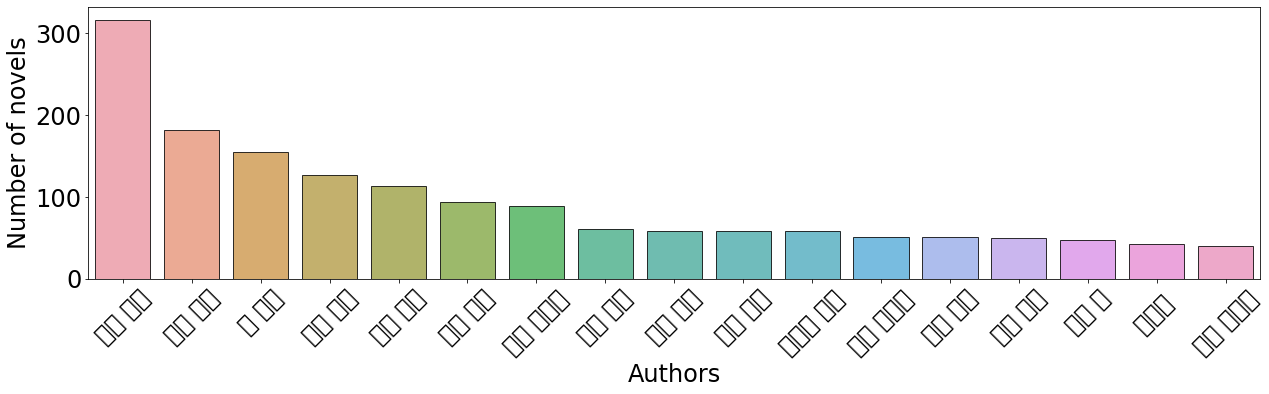

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21,5))
# plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams["font.family"] = 'DejaVu Sans'
plt.rcParams["font.size"] = 24
sns.barplot(author_count.index, author_count.values, alpha=0.8, edgecolor='black')
plt.ylabel('Number of novels')
plt.xlabel('Authors')
plt.xticks(rotation=45)
plt.show()

In [16]:
author_id_count = df_train.author_id.value_counts()
author_id_count

1670    316
82      182
50      154
933     127
908     113
1562     94
1569     89
270      60
153      58
1779     58
1224     58
146      51
305      51
162      49
281      47
52       42
1373     40
Name: author_id, dtype: int64

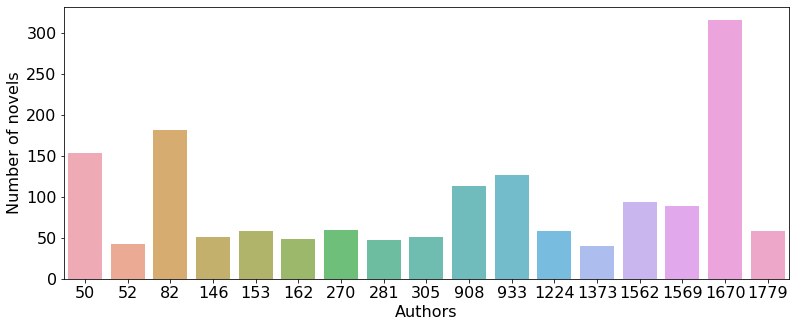

In [17]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,5))
plt.rcParams["font.size"] = 16
sns.barplot(author_id_count.index, author_id_count.values, alpha=0.8)
plt.ylabel('Number of novels', fontsize=16)
plt.xlabel('Authors', fontsize=16)
plt.show()

# TF-IDF

In [1]:
# MeCab
import MeCab

def wakati(target_text):
    t = MeCab.Tagger("-Owakati")
    wakati = t.parse(target_text)
    result = wakati.strip().split(' ')
    return result


In [2]:
# TF-IDF functions. see your interim resutls below.

from collections import Counter
from itertools import chain, repeat
from operator import countOf

import numpy as np


def build_vocabulary(corpus):
    return Counter(chain.from_iterable(corpus))


def fast_tf(corpus):
    vocab = sorted(build_vocabulary(corpus))
    countup = lambda doc: list(map(countOf, repeat(doc), vocab))
    return np.array(list(map(countup, corpus))), vocab


def fast_tfidf(corpus):
    tf, vocab = fast_tf(corpus)
#     print(tf)
    idf = np.log(len(corpus) / (tf > 0).sum(axis=0)) + 1
    return tf * idf, vocab

In [6]:
# function test 
lines = [
'リンゴを食べたら鹿が来た',
'リンゴがなっている気がある。',
'リンゴは赤い。まじで赤い。と言っていた赤井の顔は赤い']

corpus = []
for line in lines:
    corpus.append(wakati(line))

print(corpus)

tfidf, vocab = fast_tfidf(corpus)

print(tfidf)
print(vocab)
pd.DataFrame(tfidf, columns=vocab)

[['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'], ['リンゴ', 'が', 'なっ', 'て', 'いる', '気', 'が', 'ある', '。'], ['リンゴ', 'は', '赤い', '。', 'まじ', 'で', '赤い', '。', 'と', '言っ', 'て', 'い', 'た', '赤井', 'の', '顔', 'は', '赤い']]
[[0.         0.         0.         0.         1.40546511 1.40546511
  2.09861229 0.         0.         0.         0.         0.
  0.         0.         2.09861229 1.         2.09861229 0.
  0.         0.         0.         0.         2.09861229 2.09861229]
 [1.40546511 2.09861229 0.         2.09861229 2.81093022 0.
  0.         1.40546511 0.         0.         2.09861229 0.
  0.         0.         0.         1.         0.         2.09861229
  0.         0.         0.         0.         0.         0.        ]
 [2.81093022 0.         2.09861229 0.         0.         1.40546511
  0.         1.40546511 2.09861229 2.09861229 0.         2.09861229
  4.19722458 2.09861229 0.         1.         0.         0.
  2.09861229 6.29583687 2.09861229 2.09861229 0.         0.        ]]
['。', 'ある', 'い', 'いる'

,。,ある,い,いる,が,た,たら,て,で,と,...,を,リンゴ,来,気,言っ,赤い,赤井,顔,食べ,鹿
0,0.000000,0.000000,0.000000,0.000000,1.405465,1.405465,2.098612,0.000000,0.000000,0.000000,...,2.098612,1.0,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,2.098612
1,1.405465,2.098612,0.000000,2.098612,2.810930,0.000000,0.000000,1.405465,0.000000,0.000000,...,0.000000,1.0,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.810930,0.000000,2.098612,0.000000,0.000000,1.405465,0.000000,1.405465,2.098612,2.098612,...,0.000000,1.0,0.000000,0.000000,2.098612,6.295837,2.098612,2.098612,0.000000,0.000000


In [8]:
# read train and test text files
import glob

train_files = glob.glob('./aozora_datasets_min/train_datasets/*.txt')
test_files = glob.glob('./aozora_datasets_min/test_datasets/*.txt')

corpus = []
for doc in train_files:
    print(doc)
    with open(doc) as f:
#         line = f.readline()
#         print(line)
        lines = f.readlines()
        lines = [wakati(line) for line in lines] 
        tokens = list(chain.from_iterable(lines))
        tokens = list(filter(lambda token: token != '', tokens))
#         print(tokens)
        corpus.append(tokens)


./aozora_datasets_min/train_datasets/56674.txt
./aozora_datasets_min/train_datasets/46965.txt
./aozora_datasets_min/train_datasets/57458.txt
./aozora_datasets_min/train_datasets/51392.txt
./aozora_datasets_min/train_datasets/988.txt
./aozora_datasets_min/train_datasets/46761.txt
./aozora_datasets_min/train_datasets/54567.txt
./aozora_datasets_min/train_datasets/3648.txt
./aozora_datasets_min/train_datasets/54765.txt
./aozora_datasets_min/train_datasets/47492.txt
./aozora_datasets_min/train_datasets/56551.txt
./aozora_datasets_min/train_datasets/57276.txt
./aozora_datasets_min/train_datasets/47491.txt
./aozora_datasets_min/train_datasets/54686.txt
./aozora_datasets_min/train_datasets/46329.txt
./aozora_datasets_min/train_datasets/12621.txt
./aozora_datasets_min/train_datasets/4152.txt
./aozora_datasets_min/train_datasets/57094.txt
./aozora_datasets_min/train_datasets/47687.txt
./aozora_datasets_min/train_datasets/4559.txt
./aozora_datasets_min/train_datasets/4649.txt
./aozora_datasets_m

./aozora_datasets_min/train_datasets/55391.txt
./aozora_datasets_min/train_datasets/47035.txt
./aozora_datasets_min/train_datasets/56059.txt
./aozora_datasets_min/train_datasets/55392.txt
./aozora_datasets_min/train_datasets/56646.txt
./aozora_datasets_min/train_datasets/54627.txt
./aozora_datasets_min/train_datasets/56266.txt
./aozora_datasets_min/train_datasets/52409.txt
./aozora_datasets_min/train_datasets/55280.txt
./aozora_datasets_min/train_datasets/56155.txt
./aozora_datasets_min/train_datasets/55681.txt
./aozora_datasets_min/train_datasets/50387.txt
./aozora_datasets_min/train_datasets/48256.txt
./aozora_datasets_min/train_datasets/54659.txt
./aozora_datasets_min/train_datasets/33227.txt
./aozora_datasets_min/train_datasets/54836.txt
./aozora_datasets_min/train_datasets/51961.txt
./aozora_datasets_min/train_datasets/54648.txt
./aozora_datasets_min/train_datasets/53230.txt
./aozora_datasets_min/train_datasets/48023.txt
./aozora_datasets_min/train_datasets/3579.txt
./aozora_datas

./aozora_datasets_min/train_datasets/56717.txt
./aozora_datasets_min/train_datasets/42185.txt
./aozora_datasets_min/train_datasets/47713.txt
./aozora_datasets_min/train_datasets/54652.txt
./aozora_datasets_min/train_datasets/49551.txt
./aozora_datasets_min/train_datasets/57309.txt
./aozora_datasets_min/train_datasets/54581.txt
./aozora_datasets_min/train_datasets/46842.txt
./aozora_datasets_min/train_datasets/56097.txt
./aozora_datasets_min/train_datasets/1018.txt
./aozora_datasets_min/train_datasets/56392.txt
./aozora_datasets_min/train_datasets/5061.txt
./aozora_datasets_min/train_datasets/48411.txt
./aozora_datasets_min/train_datasets/18405.txt
./aozora_datasets_min/train_datasets/4092.txt
./aozora_datasets_min/train_datasets/48404.txt
./aozora_datasets_min/train_datasets/53229.txt
./aozora_datasets_min/train_datasets/52402.txt
./aozora_datasets_min/train_datasets/46384.txt
./aozora_datasets_min/train_datasets/54628.txt
./aozora_datasets_min/train_datasets/56012.txt
./aozora_dataset

./aozora_datasets_min/train_datasets/55702.txt
./aozora_datasets_min/train_datasets/56096.txt
./aozora_datasets_min/train_datasets/47792.txt
./aozora_datasets_min/train_datasets/54565.txt
./aozora_datasets_min/train_datasets/4739.txt
./aozora_datasets_min/train_datasets/53239.txt
./aozora_datasets_min/train_datasets/48154.txt
./aozora_datasets_min/train_datasets/48147.txt
./aozora_datasets_min/train_datasets/54596.txt
./aozora_datasets_min/train_datasets/47007.txt
./aozora_datasets_min/train_datasets/56713.txt
./aozora_datasets_min/train_datasets/12618.txt
./aozora_datasets_min/train_datasets/54575.txt
./aozora_datasets_min/train_datasets/52129.txt
./aozora_datasets_min/train_datasets/56700.txt
./aozora_datasets_min/train_datasets/54735.txt
./aozora_datasets_min/train_datasets/55850.txt
./aozora_datasets_min/train_datasets/49532.txt
./aozora_datasets_min/train_datasets/18407.txt
./aozora_datasets_min/train_datasets/5023.txt
./aozora_datasets_min/train_datasets/50780.txt
./aozora_datase

./aozora_datasets_min/train_datasets/48155.txt
./aozora_datasets_min/train_datasets/1189.txt
./aozora_datasets_min/train_datasets/360.txt
./aozora_datasets_min/train_datasets/52468.txt
./aozora_datasets_min/train_datasets/53213.txt
./aozora_datasets_min/train_datasets/54592.txt
./aozora_datasets_min/train_datasets/478.txt
./aozora_datasets_min/train_datasets/481.txt
./aozora_datasets_min/train_datasets/51951.txt
./aozora_datasets_min/train_datasets/54729.txt
./aozora_datasets_min/train_datasets/54706.txt
./aozora_datasets_min/train_datasets/5065.txt
./aozora_datasets_min/train_datasets/53227.txt
./aozora_datasets_min/train_datasets/45499.txt
./aozora_datasets_min/train_datasets/52446.txt
./aozora_datasets_min/train_datasets/58039.txt
./aozora_datasets_min/train_datasets/57485.txt
./aozora_datasets_min/train_datasets/4626.txt
./aozora_datasets_min/train_datasets/48397.txt
./aozora_datasets_min/train_datasets/48289.txt
./aozora_datasets_min/train_datasets/52137.txt
./aozora_datasets_min/

./aozora_datasets_min/train_datasets/43225.txt
./aozora_datasets_min/train_datasets/57512.txt
./aozora_datasets_min/train_datasets/49677.txt
./aozora_datasets_min/train_datasets/46841.txt
./aozora_datasets_min/train_datasets/1307.txt
./aozora_datasets_min/train_datasets/54631.txt
./aozora_datasets_min/train_datasets/51968.txt
./aozora_datasets_min/train_datasets/57285.txt
./aozora_datasets_min/train_datasets/55700.txt
./aozora_datasets_min/train_datasets/48334.txt
./aozora_datasets_min/train_datasets/50380.txt
./aozora_datasets_min/train_datasets/56395.txt
./aozora_datasets_min/train_datasets/49544.txt
./aozora_datasets_min/train_datasets/54657.txt
./aozora_datasets_min/train_datasets/55854.txt
./aozora_datasets_min/train_datasets/57305.txt
./aozora_datasets_min/train_datasets/46138.txt
./aozora_datasets_min/train_datasets/49535.txt
./aozora_datasets_min/train_datasets/52453.txt
./aozora_datasets_min/train_datasets/1003.txt
./aozora_datasets_min/train_datasets/56219.txt
./aozora_datase

./aozora_datasets_min/train_datasets/54741.txt
./aozora_datasets_min/train_datasets/57293.txt
./aozora_datasets_min/train_datasets/55695.txt
./aozora_datasets_min/train_datasets/43576.txt
./aozora_datasets_min/train_datasets/46150.txt
./aozora_datasets_min/train_datasets/46964.txt
./aozora_datasets_min/train_datasets/1306.txt
./aozora_datasets_min/train_datasets/57182.txt
./aozora_datasets_min/train_datasets/4448.txt
./aozora_datasets_min/train_datasets/54601.txt
./aozora_datasets_min/train_datasets/54702.txt
./aozora_datasets_min/train_datasets/51427.txt
./aozora_datasets_min/train_datasets/51964.txt
./aozora_datasets_min/train_datasets/57269.txt
./aozora_datasets_min/train_datasets/47177.txt
./aozora_datasets_min/train_datasets/56720.txt
./aozora_datasets_min/train_datasets/43091.txt
./aozora_datasets_min/train_datasets/3408.txt
./aozora_datasets_min/train_datasets/57489.txt
./aozora_datasets_min/train_datasets/46836.txt
./aozora_datasets_min/train_datasets/3065.txt
./aozora_datasets

./aozora_datasets_min/train_datasets/54761.txt
./aozora_datasets_min/train_datasets/52145.txt
./aozora_datasets_min/train_datasets/51382.txt
./aozora_datasets_min/train_datasets/56397.txt
./aozora_datasets_min/train_datasets/56231.txt
./aozora_datasets_min/train_datasets/56548.txt
./aozora_datasets_min/train_datasets/1174.txt
./aozora_datasets_min/train_datasets/49545.txt
./aozora_datasets_min/train_datasets/54995.txt
./aozora_datasets_min/train_datasets/57476.txt
./aozora_datasets_min/train_datasets/58465.txt
./aozora_datasets_min/train_datasets/50794.txt
./aozora_datasets_min/train_datasets/54689.txt
./aozora_datasets_min/train_datasets/56677.txt
./aozora_datasets_min/train_datasets/56310.txt
./aozora_datasets_min/train_datasets/2200.txt
./aozora_datasets_min/train_datasets/50778.txt
./aozora_datasets_min/train_datasets/54748.txt
./aozora_datasets_min/train_datasets/2218.txt
./aozora_datasets_min/train_datasets/55847.txt
./aozora_datasets_min/train_datasets/56220.txt
./aozora_dataset

./aozora_datasets_min/train_datasets/54620.txt
./aozora_datasets_min/train_datasets/54672.txt
./aozora_datasets_min/train_datasets/43764.txt
./aozora_datasets_min/train_datasets/57183.txt
./aozora_datasets_min/train_datasets/54637.txt
./aozora_datasets_min/train_datasets/48261.txt
./aozora_datasets_min/train_datasets/46957.txt
./aozora_datasets_min/train_datasets/54634.txt
./aozora_datasets_min/train_datasets/56211.txt
./aozora_datasets_min/train_datasets/55995.txt
./aozora_datasets_min/train_datasets/55703.txt
./aozora_datasets_min/train_datasets/53207.txt
./aozora_datasets_min/train_datasets/1118.txt
./aozora_datasets_min/train_datasets/56645.txt
./aozora_datasets_min/train_datasets/54733.txt
./aozora_datasets_min/train_datasets/48396.txt
./aozora_datasets_min/train_datasets/49549.txt
./aozora_datasets_min/train_datasets/50201.txt
./aozora_datasets_min/train_datasets/5017.txt
./aozora_datasets_min/train_datasets/53203.txt
./aozora_datasets_min/train_datasets/48332.txt
./aozora_datase

In [9]:
import json
json.dump(corpus, open('./corpus.json', 'w'), indent=4, ensure_ascii=False)

### load corpus and see frequency

In [18]:
import json

path = './corpus.json'
with open(path, encoding='utf-8') as f:
    corpus = json.load(f)


In [19]:
len(corpus[0])

57233

In [20]:
sum(map(len, corpus)) # counting all of tokens. list of list => list of numbers

24108940

In [12]:
# slower...
total_tokens = 0
for doc in corpus:
    total_tokens += len(doc)
total_tokens

24108940

### build vocab and sort as dict

In [13]:
from operator import countOf, itemgetter

In [14]:
sorted_dict = dict(sorted(build_vocabulary(corpus[:10]).items(), key=itemgetter(1), reverse=True))
sorted_dict

{'、': 11188,
 'の': 6787,
 '。': 4365,
 'に': 3929,
 'た': 3780,
 'て': 3697,
 'は': 3328,
 'を': 2927,
 'が': 2838,
 'と': 1848,
 'で': 1706,
 '」': 1583,
 'も': 1384,
 '《': 1280,
 '》': 1276,
 '「': 1168,
 'し': 1075,
 'です': 1042,
 'まし': 1010,
 'な': 933,
 'か': 791,
 'から': 777,
 'だ': 762,
 'ない': 704,
 'ん': 698,
 'へ': 685,
 'こと': 635,
 'お': 626,
 'い': 607,
 'よう': 542,
 'いる': 542,
 'その': 534,
 'う': 518,
 '］': 465,
 'ある': 400,
 'さん': 384,
 '人': 369,
 'ませ': 360,
 'それ': 345,
 'もの': 323,
 'よ': 316,
 'ます': 312,
 '…': 312,
 'さ': 295,
 'でし': 292,
 'れ': 288,
 '中': 287,
 'あり': 269,
 '見': 263,
 'つて': 257,
 'や': 246,
 '［': 245,
 '怪人': 241,
 'ね': 234,
 '傍点': 226,
 'なっ': 219,
 '一': 219,
 'する': 217,
 '［＃「': 211,
 '五': 208,
 '君': 207,
 'き': 206,
 '＃「': 201,
 'この': 199,
 'という': 197,
 '十': 196,
 '八': 194,
 '二': 192,
 'つ': 191,
 'ば': 190,
 '郎': 172,
 '――': 167,
 'ので': 166,
 'あの': 163,
 'ひ': 161,
 '何': 158,
 'なく': 156,
 'まで': 153,
 'せ': 153,
 'ゆりか': 152,
 'そう': 150,
 'でしょ': 147,
 '少年': 144,
 '上': 138,
 'り': 138,
 '円盤': 

### TF-IDF

In [16]:
tfidf, vocab = fast_tfidf(corpus)

In [30]:
k = np.array([2,3,4])
k_j = json.dumps(k.tolist())
np.array(json.loads(k_j))

array([2, 3, 4])

In [32]:
type(vocab)

list

In [33]:
import json

json.dump(tfidf.tolist(), open('./tfidf.json', 'w'), indent=4, ensure_ascii=False)
json.dump(vocab, open('./vocab.json', 'w'), indent=4, ensure_ascii=False)

In [34]:
tfidf.shape

(1589, 140488)

### slice is an object

In [44]:
list(map(lambda x: x[:10], corpus[:5]))

[['空', 'とぶ', '円盤', '［＃「', '空', 'とぶ', '円盤', '」', 'は', '中'],
 ['一', '飛鳥', 'の', '都', '以後', '奈良', '朝', '以前', 'の', '、'],
 ['六', '華', '豊年', 'の', '兆', 'という', '言葉', 'が', 'ある', '位'],
 ['扨', 'も', '／', '＼', '人間', 'の', '一世', '《', '（', 'ひと'],
 ['一', '秋', 'の', '夜', 'の', '長い', '頃', 'で', 'あっ', 'た']]

In [48]:
from operator import itemgetter
list(map(itemgetter(slice(None, 10)), corpus[:5]))

[['空', 'とぶ', '円盤', '［＃「', '空', 'とぶ', '円盤', '」', 'は', '中'],
 ['一', '飛鳥', 'の', '都', '以後', '奈良', '朝', '以前', 'の', '、'],
 ['六', '華', '豊年', 'の', '兆', 'という', '言葉', 'が', 'ある', '位'],
 ['扨', 'も', '／', '＼', '人間', 'の', '一世', '《', '（', 'ひと'],
 ['一', '秋', 'の', '夜', 'の', '長い', '頃', 'で', 'あっ', 'た']]

In [51]:
list(range(20))[slice(None, 10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
list(range(20))[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
slice(None,20)

slice(None, 20, None)

In [55]:
:10

SyntaxError: invalid syntax (<ipython-input-55-b548a13504f4>, line 1)

### pre-processing

### cos distance

In [36]:
# calculate distance between documents (with normalize)
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
distance_matrix = cosine_similarity(tfidf)
distance_matrix

array([[1.        , 0.71100263, 0.36775663, ..., 0.81465289, 0.70871175,
        0.71047912],
       [0.71100263, 1.        , 0.37653638, ..., 0.70013165, 0.6961692 ,
        0.70133772],
       [0.36775663, 0.37653638, 1.        , ..., 0.3701992 , 0.41320318,
        0.41957298],
       ...,
       [0.81465289, 0.70013165, 0.3701992 , ..., 1.        , 0.76604526,
        0.76927307],
       [0.70871175, 0.6961692 , 0.41320318, ..., 0.76604526, 1.        ,
        0.92085191],
       [0.71047912, 0.70133772, 0.41957298, ..., 0.76927307, 0.92085191,
        1.        ]])

In [38]:
distance_matrix.shape    

(1589, 1589)

### visualize similarity with PCA

In [127]:
from sklearn.decomposition import PCA

reduced = PCA(n_components = 2).fit_transform(distance_matrix)

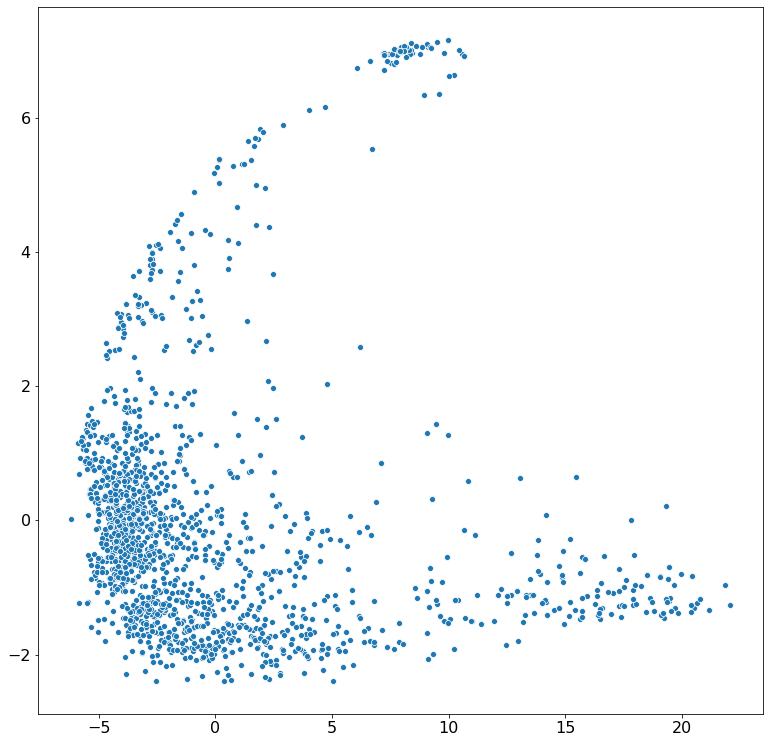

In [58]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,13))
plt.rcParams["font.size"] = 16
sns.scatterplot(*reduced.T)
plt.ylabel('', fontsize=16)
plt.xlabel('', fontsize=16)
plt.show()

### color plot for 17 authors

In [62]:
import numpy as np, pandas as pd

In [63]:
input_test='./aozora_datasets_min/test_author_novel.csv'
input_train='./aozora_datasets_min/train_author_novel.csv'
df_train = pd.read_csv(input_train)
df_train

,author_id,author_name,novel_id,novel_title,filename
0,162,若山 牧水,885,秋草と虫の音,885.txt
1,162,若山 牧水,2208,鮎釣に過した夏休み,2208.txt
2,162,若山 牧水,4393,一家,4393.txt
3,162,若山 牧水,2204,鴉と正覚坊,2204.txt
4,162,若山 牧水,43507,熊野奈智山,43507.txt
...,...,...,...,...,...
1584,153,石川 啄木,48150,無名会の一夕,48150.txt
1585,153,石川 啄木,49679,弓町より,49679.txt
1586,153,石川 啄木,818,弓町より,818.txt
1587,153,石川 啄木,47892,呼子と口笛,47892.txt


In [73]:
dict(zip(df_train.author_name, df_train.filename)) # zip arguments(iterable,iterable) map arguments

{'若山 牧水': '2207.txt',
 '岡本 綺堂': '49520.txt',
 '吉川 英治': '55274.txt',
 '紫式部 ': '5069.txt',
 '正岡 子規': '42173.txt',
 '久生 十蘭': '46077.txt',
 '野村 胡堂': '56721.txt',
 '江戸川 乱歩': '56681.txt',
 '中谷 宇吉郎': '57295.txt',
 '戸坂 潤': '55284.txt',
 '種田 山頭火': '48267.txt',
 '高村 光雲': '47040.txt',
 '折口 信夫': '18392.txt',
 '坂本 竜馬': '52153.txt',
 '石川 啄木': '48145.txt',
 '木暮 理太郎': '56556.txt',
 '泉 鏡花': '3426.txt'}

In [74]:
filename_author_mapping = dict(zip(df_train.filename, df_train.author_name))
filename_author_mapping

{'885.txt': '若山 牧水',
 '2208.txt': '若山 牧水',
 '4393.txt': '若山 牧水',
 '2204.txt': '若山 牧水',
 '43507.txt': '若山 牧水',
 '4633.txt': '若山 牧水',
 '2200.txt': '若山 牧水',
 '2199.txt': '若山 牧水',
 '4394.txt': '若山 牧水',
 '2693.txt': '若山 牧水',
 '2211.txt': '若山 牧水',
 '2212.txt': '若山 牧水',
 '2623.txt': '若山 牧水',
 '2624.txt': '若山 牧水',
 '2636.txt': '若山 牧水',
 '3408.txt': '若山 牧水',
 '2625.txt': '若山 牧水',
 '2626.txt': '若山 牧水',
 '2214.txt': '若山 牧水',
 '2628.txt': '若山 牧水',
 '2622.txt': '若山 牧水',
 '2629.txt': '若山 牧水',
 '2210.txt': '若山 牧水',
 '2619.txt': '若山 牧水',
 '2215.txt': '若山 牧水',
 '2217.txt': '若山 牧水',
 '2218.txt': '若山 牧水',
 '2219.txt': '若山 牧水',
 '2220.txt': '若山 牧水',
 '2222.txt': '若山 牧水',
 '2580.txt': '若山 牧水',
 '2631.txt': '若山 牧水',
 '2632.txt': '若山 牧水',
 '2633.txt': '若山 牧水',
 '2694.txt': '若山 牧水',
 '4648.txt': '若山 牧水',
 '886.txt': '若山 牧水',
 '49620.txt': '若山 牧水',
 '1079.txt': '若山 牧水',
 '2205.txt': '若山 牧水',
 '43446.txt': '若山 牧水',
 '2201.txt': '若山 牧水',
 '4395.txt': '若山 牧水',
 '2206.txt': '若山 牧水',
 '4448.txt': '若山 牧水',
 '4649.tx

In [90]:
filename_author_mapping.get('2625.txt')

'若山 牧水'

In [88]:
from operator import attrgetter
dict(zip(*attrgetter('filename', 'author_name')(df_train)))

{'885.txt': '若山 牧水',
 '2208.txt': '若山 牧水',
 '4393.txt': '若山 牧水',
 '2204.txt': '若山 牧水',
 '43507.txt': '若山 牧水',
 '4633.txt': '若山 牧水',
 '2200.txt': '若山 牧水',
 '2199.txt': '若山 牧水',
 '4394.txt': '若山 牧水',
 '2693.txt': '若山 牧水',
 '2211.txt': '若山 牧水',
 '2212.txt': '若山 牧水',
 '2623.txt': '若山 牧水',
 '2624.txt': '若山 牧水',
 '2636.txt': '若山 牧水',
 '3408.txt': '若山 牧水',
 '2625.txt': '若山 牧水',
 '2626.txt': '若山 牧水',
 '2214.txt': '若山 牧水',
 '2628.txt': '若山 牧水',
 '2622.txt': '若山 牧水',
 '2629.txt': '若山 牧水',
 '2210.txt': '若山 牧水',
 '2619.txt': '若山 牧水',
 '2215.txt': '若山 牧水',
 '2217.txt': '若山 牧水',
 '2218.txt': '若山 牧水',
 '2219.txt': '若山 牧水',
 '2220.txt': '若山 牧水',
 '2222.txt': '若山 牧水',
 '2580.txt': '若山 牧水',
 '2631.txt': '若山 牧水',
 '2632.txt': '若山 牧水',
 '2633.txt': '若山 牧水',
 '2694.txt': '若山 牧水',
 '4648.txt': '若山 牧水',
 '886.txt': '若山 牧水',
 '49620.txt': '若山 牧水',
 '1079.txt': '若山 牧水',
 '2205.txt': '若山 牧水',
 '43446.txt': '若山 牧水',
 '2201.txt': '若山 牧水',
 '4395.txt': '若山 牧水',
 '2206.txt': '若山 牧水',
 '4448.txt': '若山 牧水',
 '4649.tx

In [133]:
type(attrgetter('filename','author_name')(df_train))

tuple

In [91]:
# create map author name and text file name
import os

train_filenames = list(map(os.path.basename, train_files))
index_author_name = list(map(filename_author_mapping.get, train_filenames))

pd.DataFrame(tfidf, columns=vocab, index=index_author_name)

,!,!!!,!――,!’,!’［＃,!”,!,!《,!」,!（,...,｜｜ │,｜｜ │（,｜｜ ┌,｜｜ └,｝,～,～～～～～～～～～～～～～～～,～～～～～～～～～～～～～～～～,～～～～～～～～～～～～～～～～～,～～～～～～～～～～～～～～～～～～～～～～～～～
江戸川 乱歩,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
折口 信夫,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中谷 宇吉郎,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
坂本 竜馬,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
岡本 綺堂,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
岡本 綺堂,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中谷 宇吉郎,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
吉川 英治,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
紫式部,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
len(index_author_name)

1589

In [95]:
reduced.shape

(1589, 2)

In [101]:
index_author_name

['江戸川 乱歩',
 '折口 信夫',
 '中谷 宇吉郎',
 '坂本 竜馬',
 '岡本 綺堂',
 '高村 光雲',
 '野村 胡堂',
 '泉 鏡花',
 '野村 胡堂',
 '久生 十蘭',
 '木暮 理太郎',
 '中谷 宇吉郎',
 '久生 十蘭',
 '野村 胡堂',
 '折口 信夫',
 '折口 信夫',
 '泉 鏡花',
 '野村 胡堂',
 '折口 信夫',
 '泉 鏡花',
 '若山 牧水',
 '石川 啄木',
 '種田 山頭火',
 '岡本 綺堂',
 '種田 山頭火',
 '高村 光雲',
 '岡本 綺堂',
 '若山 牧水',
 '野村 胡堂',
 '木暮 理太郎',
 '折口 信夫',
 '坂本 竜馬',
 '野村 胡堂',
 '高村 光雲',
 '野村 胡堂',
 '久生 十蘭',
 '野村 胡堂',
 '木暮 理太郎',
 '野村 胡堂',
 '折口 信夫',
 '折口 信夫',
 '岡本 綺堂',
 '岡本 綺堂',
 '坂本 竜馬',
 '野村 胡堂',
 '久生 十蘭',
 '坂本 竜馬',
 '岡本 綺堂',
 '石川 啄木',
 '久生 十蘭',
 '坂本 竜馬',
 '石川 啄木',
 '坂本 竜馬',
 '吉川 英治',
 '高村 光雲',
 '江戸川 乱歩',
 '岡本 綺堂',
 '戸坂 潤',
 '岡本 綺堂',
 '野村 胡堂',
 '吉川 英治',
 '泉 鏡花',
 '泉 鏡花',
 '正岡 子規',
 '戸坂 潤',
 '江戸川 乱歩',
 '野村 胡堂',
 '久生 十蘭',
 '坂本 竜馬',
 '野村 胡堂',
 '折口 信夫',
 '戸坂 潤',
 '石川 啄木',
 '中谷 宇吉郎',
 '石川 啄木',
 '種田 山頭火',
 '石川 啄木',
 '高村 光雲',
 '坂本 竜馬',
 '泉 鏡花',
 '坂本 竜馬',
 '正岡 子規',
 '正岡 子規',
 '久生 十蘭',
 '戸坂 潤',
 '坂本 竜馬',
 '折口 信夫',
 '岡本 綺堂',
 '野村 胡堂',
 '種田 山頭火',
 '野村 胡堂',
 '野村 胡堂',
 '吉川 英治',
 '折口 信夫',
 '野村 胡堂',
 '江戸川 乱歩',
 '野村 胡堂',
 '吉川 英治',
 '紫式部 ',
 '中谷 宇吉

In [100]:
from matplotlib.colors import cnames
cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [114]:
list(cnames)[0]

'aliceblue'

In [104]:
author_class_mapping = dict(zip(set(index_author_name),range(17)))

In [120]:
from itertools import count
dict(zip(set(index_author_name), count())) # count() returns infinite list

{'若山 牧水': 0,
 '野村 胡堂': 1,
 '中谷 宇吉郎': 2,
 '泉 鏡花': 3,
 '坂本 竜馬': 4,
 '石川 啄木': 5,
 '吉川 英治': 6,
 '久生 十蘭': 7,
 '木暮 理太郎': 8,
 '正岡 子規': 9,
 '紫式部 ': 10,
 '戸坂 潤': 11,
 '江戸川 乱歩': 12,
 '折口 信夫': 13,
 '高村 光雲': 14,
 '岡本 綺堂': 15,
 '種田 山頭火': 16}

In [107]:
index_class = list(map(author_class_mapping.get, index_author_name))

In [121]:
# map is calculated when wrapper is called
np.fromiter(map(author_class_mapping.get, index_author_name), dtype='int32')

array([12, 13,  2, ...,  6, 10, 10], dtype=int32)

In [112]:
# making mask
np.array(index_class) == 4

array([False, False, False, ..., False, False, False])

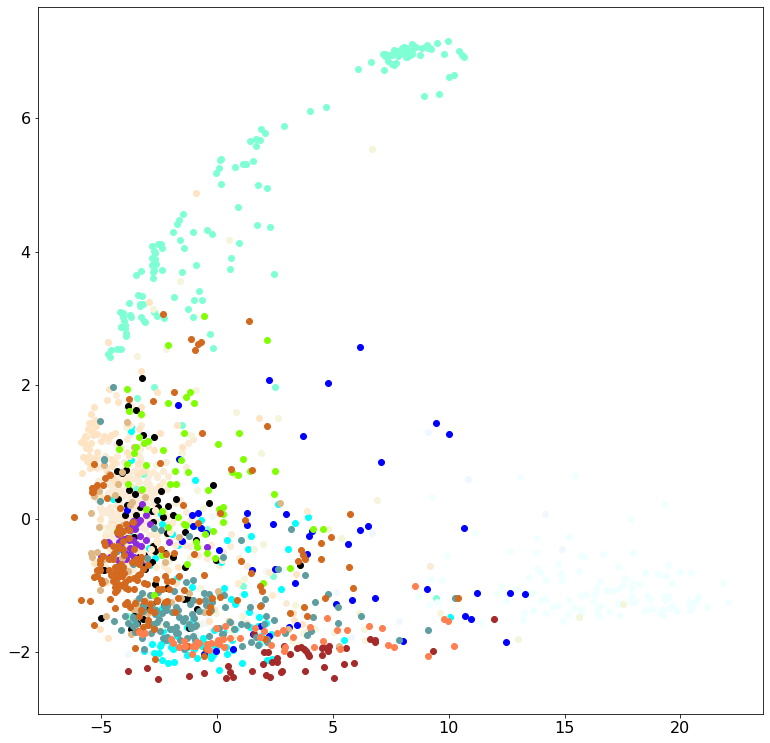

In [128]:
# colored scatter plot by using mask

n_classes = 17
index_class_np = np.array(index_class)

plt.figure(figsize=(13,13))
plt.rcParams["font.size"] = 16

for label in range(n_classes):
    mask = index_class_np == label
    plt.scatter(*reduced[mask].T, color=list(cnames)[label])


### plot with t-SNE

In [125]:
from sklearn.manifold import TSNE

reduced_tsne = TSNE(n_components = 2, random_state = 0).fit_transform(distance_matrix)

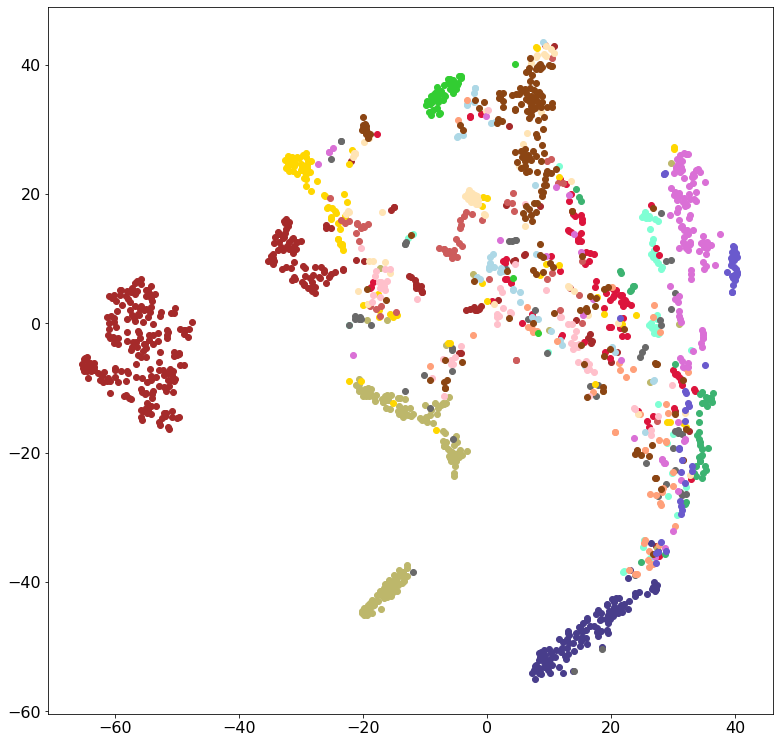

In [132]:
# colored scatter plot by using mask

n_classes = 17
index_class_np = np.array(index_class)

plt.figure(figsize=(13,13))
plt.rcParams["font.size"] = 16

for label in range(n_classes):
    mask = index_class_np == label
    plt.scatter(*reduced_tsne[mask].T, color=list(cnames)[label*8+3])


### reduce vocab dimension from 140k to 2k ...

#### freqency

In [166]:
# count frequency 
from collections import Counter
from itertools import chain

iter_obj = chain.from_iterable([[13,5,6],[3,4,56,2,5,6,6]]) # memory is not restored
# list(chain.from_iterable([[13,5,6],[3,4,56,2,5,6,6]]))[0] # memory is used for list
next(iter_obj)

13

In [169]:
next(iter_obj, 'end_of_iter')

3

In [170]:
next(iter_obj)

4

In [173]:
Counter([1,1,4,4,4,4,4,44,5,5,6,87,6])

Counter({1: 2, 4: 5, 44: 1, 5: 2, 6: 2, 87: 1})

In [174]:
Counter([1,1,4,4,4,4,4,44,5,5,6,87,6]).get(4)

4

In [177]:
Counter([1,1,4,4,4,4,4,44,5,5,6,87,6]).get(100)

In [176]:
Counter([1,1,4,4,4,4,4,44,5,5,6,87,6]).get(100, 'err')

'err'

In [179]:
dict(Counter([1,1,4,4,4,4,4,44,5,5,6,87,6]))[100]

KeyError: 100

# 19.12.25 fast running

### building vocab (tokens, freq) and get removable tokens

In [21]:
from collections import Counter
from itertools import chain
from operator import itemgetter

In [22]:
vocab = Counter(chain.from_iterable(corpus))
vocab

Counter({'空': 4695,
         'とぶ': 144,
         '円盤': 149,
         '［＃「': 31280,
         '」': 279999,
         'は': 654175,
         '中': 40564,
         '見出し': 12481,
         '］': 97111,
         '、': 1540354,
         'アメリカ': 556,
         'から': 137586,
         'はじまっ': 131,
         'て': 643341,
         '世界じゅう': 40,
         'の': 1134021,
         'に': 730131,
         'あらわれ': 872,
         'まし': 62701,
         'た': 595800,
         '。': 690067,
         '日本': 6579,
         'も': 277546,
         'こと': 95506,
         'が': 463873,
         'ずっと': 934,
         'まえ': 2261,
         '新聞': 2841,
         'のっ': 284,
         'い': 117586,
         'その': 82771,
         'お話': 1161,
         'はじまる': 122,
         'ころ': 2082,
         'それ': 57970,
         'しきりに': 672,
         'あらわれる': 68,
         'よう': 60257,
         'なっ': 33072,
         'です': 65514,
         '大きな': 4583,
         'お': 92143,
         'さら': 962,
         'な': 164431,
         '丸い': 168,
         'もの': 63911,
    

In [24]:
# get removable tokens list from vocab dict
# appear under 10 or over 10000 times
'''
dict --(.items())-> tuple iterable -(filter)-> tuple iterable --(map)-> list of string [str]
lower memory consumption
'''

pred = lambda x: x[1] <= 10 or x[1] >= 10000 # name of predicate is used often. 
sotodashi_words = list(map(itemgetter(0), filter(pred ,vocab.items())))
len(sotodashi_words)

94927

In [25]:
sotodashi_words

['［＃「',
 '」',
 'は',
 '中',
 '見出し',
 '］',
 '、',
 'から',
 'て',
 'の',
 'に',
 'まし',
 'た',
 '。',
 'も',
 'こと',
 'が',
 'い',
 'その',
 'それ',
 'よう',
 'なっ',
 'です',
 'お',
 'な',
 'もの',
 'さ',
 'で',
 'を',
 'か',
 'ない',
 'という',
 '人',
 'あり',
 'す',
 'ぐりにきたのかもしれない',
 'でも',
 '「',
 'そんな',
 'ある',
 '大',
 '見',
 'なら',
 'や',
 'また',
 '《',
 '》',
 'だ',
 'など',
 'いる',
 '見え',
 'し',
 'より',
 'こ',
 'この',
 '上',
 'へ',
 '一',
 'じゃ',
 'と',
 'いっ',
 'う',
 'ませ',
 'ん',
 'でし',
 'むとんじゃく',
 'れる',
 'なり',
 'まで',
 'なかっ',
 '出',
 'たち',
 'だろ',
 '日',
 'ほど',
 'だっ',
 'する',
 'ひ',
 'ら',
 'ご',
 'ば',
 '六',
 'うち',
 'せ',
 'ところ',
 '君',
 'き',
 'さん',
 '二',
 '十',
 '五',
 'よく',
 '家',
 'そこ',
 'けんび鏡',
 '見る',
 'だいす',
 'って',
 'ます',
 'ばかり',
 'いう',
 'ね',
 'よ',
 '年',
 'じ',
 'み',
 'れ',
 'どう',
 'ゆうじ',
 '三',
 'られ',
 'なく',
 '？',
 'そう',
 '顔',
 'ず',
 'そして',
 'あの',
 'ま',
 'え',
 'ウエルズ',
 'たら',
 '…',
 '出くわす',
 'ゅんかん',
 '目',
 '前',
 'もう',
 'いい',
 '気',
 '者',
 '［',
 '＃「',
 '着色',
 '時',
 'ので',
 'まだ',
 'すれちがう',
 'なる',
 '手',
 'おもいだし',
 'として',
 '心',
 'ょうなはやさで',
 '声',
 'アレアレ',
 '一つ

In [29]:
from itertools import filterfalse


def word_remover(words):
    implies = dict.fromkeys(words, True).get
    remove_words= lambda doc: list(filterfalse(implies, doc))
    return remove_words

In [30]:
# [str] -> [str] (meaning: input listof string -> output list of string)
remove_sotodashi_words = word_remover(sotodashi_words)
remove_sotodashi_words(corpus[0])

['空',
 'とぶ',
 '円盤',
 '空',
 'とぶ',
 '円盤',
 '空',
 'とぶ',
 '円盤',
 'アメリカ',
 'はじまっ',
 '世界じゅう',
 '空',
 'あらわれ',
 '日本',
 'あらわれ',
 'ずっと',
 'まえ',
 '新聞',
 'のっ',
 'お話',
 'はじまる',
 'ころ',
 '日本',
 '空',
 'しきりに',
 'あらわれる',
 '大きな',
 'さら',
 '丸い',
 'ひじ',
 'ょうな',
 '早',
 '高い',
 '空',
 '飛ん',
 'いく',
 'どこ',
 '国',
 '新',
 'がた',
 '偵察',
 '飛行機',
 'いや',
 'ひょっとしたら',
 '宇宙',
 'どこ',
 '星',
 '地球',
 'おおく',
 'ばか',
 '都会',
 '空',
 'ながめ',
 'みんな',
 '信用',
 'できる',
 '山',
 'おく',
 'いなか',
 'ひとり',
 'ふたり',
 'ちがい',
 '大きな',
 '流星',
 '円盤',
 '感じ',
 'かも',
 'しれ',
 '空',
 '蜃気楼',
 'しんきろう',
 '現象',
 'おこる',
 '山道',
 '走っ',
 '自動車',
 'ヘッドライト',
 '空',
 'うつっ',
 'ちょうど',
 '円盤',
 '飛ん',
 'かも',
 'しれ',
 'いずれ',
 'ふしぎ',
 '飛行機',
 'はず',
 'なに',
 'しょう',
 '空',
 'とぶ',
 '円盤',
 '地球',
 'ど',
 'だって',
 '着陸',
 'まじめ',
 '考えよ',
 'しかし',
 '空',
 'とぶ',
 '円盤',
 'ほう',
 'うわさ',
 'このごろ',
 'ほうぼう',
 '国',
 'しきり',
 'あらわ',
 'いま',
 'あまり',
 '飛ん',
 '日本',
 '空',
 'たびたび',
 'がた',
 'あらわす',
 'じっさい',
 'ごく',
 'すくない',
 '新聞',
 'はなし',
 '信用',
 'きっと',
 'なにか',
 'ほか',
 'まちがえ',
 'たか',
 'くくっ',
 'ところが',
 '空',
 'とぶ',
 

In [33]:
corpus_removed = list(map(remove_sotodashi_words, corpus))

In [32]:
len(corpus_removed), len(corpus_removed[0]), len(corpus[0])

(1589, 16972, 57233)

### tf-idf for corpus reduced

In [35]:
# TF-IDF functions. see your interim resutls below.

from collections import Counter
from itertools import chain, repeat
from operator import countOf

import numpy as np


def build_vocabulary(corpus):
    return Counter(chain.from_iterable(corpus))


def fast_tf(corpus):
    vocab = sorted(build_vocabulary(corpus))
    countup = lambda doc: list(map(countOf, repeat(doc), vocab))
    return np.array(list(map(countup, corpus))), vocab


def fast_tfidf(corpus):
    tf, vocab = fast_tf(corpus)
    idf = np.log(len(corpus) / (tf > 0).sum(axis=0)) + 1
    return tf * idf, vocab

In [36]:
tfidf_removed, vocab_removed = fast_tfidf(corpus_removed)

In [39]:
tfidf_removed.shape, len(vocab_removed)

((1589, 45561), 45561)

In [40]:
import json


json.dump(tfidf_removed.tolist(), open('./tfidf_removed.json', 'w'), indent=4, ensure_ascii=False)
json.dump(vocab_removed, open('./vocab_removed.json', 'w'), indent=4, ensure_ascii=False)

## Continue: load tf-idf matrix 

In [1]:
import json


path = './tfidf_removed.json'
with open(path, encoding='utf-8') as f:
    tfidf_removed = json.load(f)

path_v = './vocab_removed.json'
with open(path_v, encoding='utf-8') as f:
    vocab_removed = json.load(f)


In [2]:
len(tfidf_removed), len(tfidf_removed[0]), len(vocab_removed)

(1589, 45561, 45561)

In [3]:
import pandas as pd


df = pd.DataFrame(tfidf_removed,columns=vocab_removed)
df.iloc[:, 2000:2020]

Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #2.
Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #3.


,お隣,お雛様,お雪,お預け,お願い,かあさん,かい,かいい,かいがいしい,かいがいしく,かいき,かいくれ,かいげん,かいこう,かいこん,かいさ,かいし,かいしゃく,かいしん,かいじゅう
0,0.0,0.0,0.0,0.0,0.0,0.0,22.794943,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.753457,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586,0.0,0.0,0.0,0.0,0.0,0.0,5.260372,0.0,0.0,0.0,5.731803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1587,0.0,0.0,0.0,0.0,0.0,0.0,7.013829,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 20.01.03 fitting with Random Forest

### make file name index and filename - author mapping

In [144]:
# labeling
import numpy as np
import pandas as pd


input_test='./aozora_datasets_min/test_author_novel.csv'
input_train='./aozora_datasets_min/train_author_novel.csv'
df_train = pd.read_csv(input_train)
filename_author_mapping = dict(zip(df_train.filename, df_train.author_name))
author_name_id_mapping = dict(zip(df_train.author_name, df_train.author_id))
author_name_id_mapping

{'若山 牧水': 162,
 '岡本 綺堂': 82,
 '吉川 英治': 1562,
 '紫式部 ': 52,
 '正岡 子規': 305,
 '久生 十蘭': 1224,
 '野村 胡堂': 1670,
 '江戸川 乱歩': 1779,
 '中谷 宇吉郎': 1569,
 '戸坂 潤': 281,
 '種田 山頭火': 146,
 '高村 光雲': 270,
 '折口 信夫': 933,
 '坂本 竜馬': 908,
 '石川 啄木': 153,
 '木暮 理太郎': 1373,
 '泉 鏡花': 50}

In [22]:
# TIPS
# series -> dict, dict -> series
ser1 = df_train.set_index('filename').author_name
ser2 = pd.Series(df_train.set_index('filename').author_name.to_dict(), name='author_name')
ser1.equals(ser2)

True

In [57]:
import glob, os


train_files = glob.glob('./aozora_datasets_min/train_datasets/*.txt')
train_files_iter = glob.iglob('./aozora_datasets_min/train_datasets/*.txt')

# train_filenames = list(map(os.path.basename, train_files)) # reproduce result
train_filenames = list(map(os.path.basename, train_files_iter)) # doesnt reproduce result when iter is consumed
train_author_names_idx = list(map(filename_author_mapping.get, train_filenames))
train_author_names_idx

['江戸川 乱歩',
 '折口 信夫',
 '中谷 宇吉郎',
 '坂本 竜馬',
 '岡本 綺堂',
 '高村 光雲',
 '野村 胡堂',
 '泉 鏡花',
 '野村 胡堂',
 '久生 十蘭',
 '木暮 理太郎',
 '中谷 宇吉郎',
 '久生 十蘭',
 '野村 胡堂',
 '折口 信夫',
 '折口 信夫',
 '泉 鏡花',
 '野村 胡堂',
 '折口 信夫',
 '泉 鏡花',
 '若山 牧水',
 '石川 啄木',
 '種田 山頭火',
 '岡本 綺堂',
 '種田 山頭火',
 '高村 光雲',
 '岡本 綺堂',
 '若山 牧水',
 '野村 胡堂',
 '木暮 理太郎',
 '折口 信夫',
 '坂本 竜馬',
 '野村 胡堂',
 '高村 光雲',
 '野村 胡堂',
 '久生 十蘭',
 '野村 胡堂',
 '木暮 理太郎',
 '野村 胡堂',
 '折口 信夫',
 '折口 信夫',
 '岡本 綺堂',
 '岡本 綺堂',
 '坂本 竜馬',
 '野村 胡堂',
 '久生 十蘭',
 '坂本 竜馬',
 '岡本 綺堂',
 '石川 啄木',
 '久生 十蘭',
 '坂本 竜馬',
 '石川 啄木',
 '坂本 竜馬',
 '吉川 英治',
 '高村 光雲',
 '江戸川 乱歩',
 '岡本 綺堂',
 '戸坂 潤',
 '岡本 綺堂',
 '野村 胡堂',
 '吉川 英治',
 '泉 鏡花',
 '泉 鏡花',
 '正岡 子規',
 '戸坂 潤',
 '江戸川 乱歩',
 '野村 胡堂',
 '久生 十蘭',
 '坂本 竜馬',
 '野村 胡堂',
 '折口 信夫',
 '戸坂 潤',
 '石川 啄木',
 '中谷 宇吉郎',
 '石川 啄木',
 '種田 山頭火',
 '石川 啄木',
 '高村 光雲',
 '坂本 竜馬',
 '泉 鏡花',
 '坂本 竜馬',
 '正岡 子規',
 '正岡 子規',
 '久生 十蘭',
 '戸坂 潤',
 '坂本 竜馬',
 '折口 信夫',
 '岡本 綺堂',
 '野村 胡堂',
 '種田 山頭火',
 '野村 胡堂',
 '野村 胡堂',
 '吉川 英治',
 '折口 信夫',
 '野村 胡堂',
 '江戸川 乱歩',
 '野村 胡堂',
 '吉川 英治',
 '紫式部 ',
 '中谷 宇吉

In [130]:
df_tfidf = pd.DataFrame(tfidf_removed, columns=vocab_removed, index=train_filenames)
df_tfidf.iloc[:, 2000:2020]

,お隣,お雛様,お雪,お預け,お願い,かあさん,かい,かいい,かいがいしい,かいがいしく,かいき,かいくれ,かいげん,かいこう,かいこん,かいさ,かいし,かいしゃく,かいしん,かいじゅう
56674.txt,0.0,0.0,0.0,0.0,0.0,0.0,22.794943,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46965.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57458.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51392.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
988.txt,0.0,0.0,0.0,0.0,0.0,0.0,1.753457,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56511.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57264.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52439.txt,0.0,0.0,0.0,0.0,0.0,0.0,5.260372,0.0,0.0,0.0,5.731803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021.txt,0.0,0.0,0.0,0.0,0.0,0.0,7.013829,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### split train, test
hold out test datasets

In [127]:
test_ratio = 0.2
rng = np.random.RandomState(0)

def holdout_test(group):
    test_number = int(np.ceil(len(group)*test_ratio))
    # test_filenames = rng.choice(group.filename, test_number, replace=False)
    test_filenames = rng.permutation(group.filename)[:test_number]
    df = group.assign(is_test=np.isin(group.filename, test_filenames).astype('i4'))
    ser = df.set_index('filename').is_test
    return ser

# variable names can be more discriptive

In [136]:
gb = df_train.groupby('author_id')
stack = []

for key, group in gb:
    stack.append(holdout_test(group))

is_test = pd.concat(stack)
is_test.sum()

325

In [141]:
ser_is_train = is_test == 0
df_tfidf_train = df_tfidf.loc[ser_is_train]
df_tfidf_test = df_tfidf.loc[~ser_is_train]

In [104]:
# TIPS
# how to use rng.choice()
rng.choice(range(3), 10, replace=True) # good
rng.choice(range(3), 10, replace=False) # error

ValueError: Cannot take a larger sample than population when 'replace=False'

### Random Forest Classifier

In [142]:
df_tfidf_train.shape

(1264, 45561)

In [156]:
# make categorycal 
author_name_idx = list(map(filename_author_mapping.get, df_tfidf_train.index))
author_name_idx

['江戸川 乱歩',
 '折口 信夫',
 '中谷 宇吉郎',
 '坂本 竜馬',
 '岡本 綺堂',
 '高村 光雲',
 '野村 胡堂',
 '泉 鏡花',
 '野村 胡堂',
 '久生 十蘭',
 '木暮 理太郎',
 '中谷 宇吉郎',
 '久生 十蘭',
 '野村 胡堂',
 '折口 信夫',
 '泉 鏡花',
 '野村 胡堂',
 '折口 信夫',
 '泉 鏡花',
 '若山 牧水',
 '石川 啄木',
 '種田 山頭火',
 '高村 光雲',
 '岡本 綺堂',
 '折口 信夫',
 '坂本 竜馬',
 '野村 胡堂',
 '野村 胡堂',
 '久生 十蘭',
 '野村 胡堂',
 '木暮 理太郎',
 '野村 胡堂',
 '折口 信夫',
 '折口 信夫',
 '岡本 綺堂',
 '坂本 竜馬',
 '野村 胡堂',
 '久生 十蘭',
 '坂本 竜馬',
 '岡本 綺堂',
 '石川 啄木',
 '久生 十蘭',
 '坂本 竜馬',
 '石川 啄木',
 '坂本 竜馬',
 '高村 光雲',
 '戸坂 潤',
 '岡本 綺堂',
 '野村 胡堂',
 '吉川 英治',
 '泉 鏡花',
 '泉 鏡花',
 '正岡 子規',
 '戸坂 潤',
 '江戸川 乱歩',
 '野村 胡堂',
 '坂本 竜馬',
 '野村 胡堂',
 '折口 信夫',
 '戸坂 潤',
 '石川 啄木',
 '中谷 宇吉郎',
 '石川 啄木',
 '高村 光雲',
 '坂本 竜馬',
 '泉 鏡花',
 '坂本 竜馬',
 '正岡 子規',
 '久生 十蘭',
 '戸坂 潤',
 '岡本 綺堂',
 '野村 胡堂',
 '種田 山頭火',
 '野村 胡堂',
 '野村 胡堂',
 '吉川 英治',
 '折口 信夫',
 '野村 胡堂',
 '江戸川 乱歩',
 '野村 胡堂',
 '吉川 英治',
 '中谷 宇吉郎',
 '折口 信夫',
 '岡本 綺堂',
 '坂本 竜馬',
 '江戸川 乱歩',
 '中谷 宇吉郎',
 '岡本 綺堂',
 '種田 山頭火',
 '岡本 綺堂',
 '野村 胡堂',
 '中谷 宇吉郎',
 '折口 信夫',
 '折口 信夫',
 '吉川 英治',
 '野村 胡堂',
 '中谷 宇吉郎',
 '泉 鏡花',
 '泉 鏡花',
 '正岡 子

In [163]:
from itertools import count

author_category_map = dict(zip(set(author_name_idx),count()))
author_category_map

{'泉 鏡花': 0,
 '戸坂 潤': 1,
 '紫式部 ': 2,
 '高村 光雲': 3,
 '種田 山頭火': 4,
 '石川 啄木': 5,
 '木暮 理太郎': 6,
 '久生 十蘭': 7,
 '野村 胡堂': 8,
 '若山 牧水': 9,
 '正岡 子規': 10,
 '折口 信夫': 11,
 '中谷 宇吉郎': 12,
 '岡本 綺堂': 13,
 '坂本 竜馬': 14,
 '吉川 英治': 15,
 '江戸川 乱歩': 16}

In [212]:
y_train = np.array(list(map(author_category_map.get, author_name_idx)))
y_train

array([16, 11, 12, ..., 13, 15,  2])

In [213]:
X_train = df_tfidf_train.values

In [215]:
author_name_idx_test = list(map(filename_author_mapping.get, df_tfidf_test.index))
y_test = np.array(list(map(author_category_map.get, author_name_idx_test)))
y_test

array([11, 13,  4,  9,  8,  6,  3, 13, 15, 16, 13,  7,  4,  5, 10, 14, 11,
        2,  7,  6, 11,  5, 15, 13, 15,  0, 15,  8, 15,  0,  6,  8, 13,  8,
       11,  3,  1, 16, 13, 12, 13,  0, 11,  8, 12,  8,  9,  5, 15,  0,  3,
       14,  4,  8, 14,  8,  7,  1, 11,  9,  8,  0, 12, 15,  8,  0,  6,  8,
        8,  5,  8,  8, 12,  7, 11, 11,  2, 11, 12,  1,  2, 13, 13, 15,  8,
        8, 15,  9, 13,  0,  8, 16, 13,  6, 11,  8,  8,  0, 12,  5,  8,  8,
        0, 15,  2,  1,  8,  8,  6,  2, 10, 11,  3, 16, 13, 16,  8, 13,  8,
        8,  8,  0,  8, 13, 12,  3, 13, 14, 11, 14,  0,  3,  8, 10,  8, 12,
       15,  0, 12, 14, 12, 14,  4,  5,  8, 10, 14, 13,  7, 14, 11,  6, 16,
        1,  5,  8,  1,  8,  9, 13,  8,  4,  0, 10, 14, 13,  3,  8,  3, 15,
        2,  1, 13, 12,  3, 10,  7, 14,  8,  0, 10, 13, 15, 15, 16,  4,  1,
       11, 11, 12, 15, 16, 13,  0,  8, 13, 14, 10,  1, 14,  0,  9, 15, 14,
        5,  2,  0, 11,  4,  8,  0,  5, 12, 13,  8, 13,  0,  7, 13, 14, 14,
        0,  0,  8,  6,  7

In [216]:
X_test = df_tfidf_test.values
X_test.shape

(325, 45561)

In [214]:
# create and train classifier
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=0, max_depth=3, class_weight='balanced')
clf = RandomForestClassifier(random_state=0, max_depth=6, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [217]:
y_pred = clf.predict(X_test)

In [218]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.8299936789606469

In [220]:
# premitive accuracy
(y_pred == y_test).mean()

0.8461538461538461

### TIPS how balanced score works

In [247]:
y_true = np.random.RandomState(0).binomial(3, 0.05, 1000)
y_true

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [248]:
np.bincount(y_true) / 1000

array([0.839, 0.156, 0.005])

In [249]:
y_pred_0 = np.zeros(1000, dtype=y_pred.dtype)
y_pred_1 = np.ones(1000, dtype=y_pred.dtype)

In [250]:
balanced_accuracy_score(y_true, y_pred_0)

0.3333333333333333

In [251]:
balanced_accuracy_score(y_true, y_pred_1)

0.3333333333333333

In [252]:
(y_pred_0 == y_true).mean()

0.839

In [253]:
(y_pred_1 == y_true).mean()

0.156

### TIPS 分類器をbalanceすることについて
read this.
https://takuti.me/note/adjusting-for-oversampling-and-undersampling/

In [204]:
rng = np.random.RandomState(0)
y_train = rng.binomial(1, 0.2, X_train.shape[0])

(array([  0.,   0.,   0.,   2.,   4.,  21.,  23.,  39.,  86., 489., 594.,
          6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

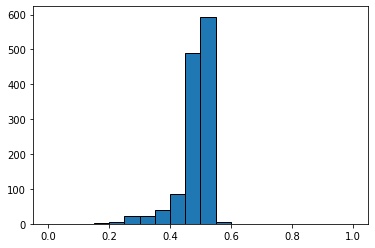

In [211]:
# balanced 

import matplotlib.pyplot as plt 
clf = RandomForestClassifier(random_state=0, max_depth=3, class_weight='balanced')
clf.fit(X_train, y_train)
plt.hist(clf.predict_proba(X_train)[:, 1], bins=20, edgecolor='black', range=(0, 1))

(array([  0.,   0.,   0., 734., 495.,  24.,   6.,   3.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

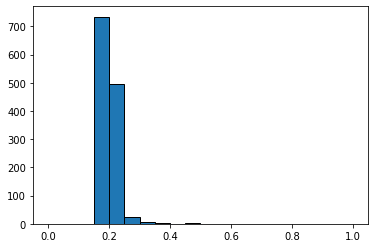

In [208]:
# unbalanced 

import matplotlib.pyplot as plt 
clf = RandomForestClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train)
plt.hist(clf.predict_proba(X_train)[:, 1], bins=20, edgecolor='black', range=(0, 1))

## next step
- upgrade classifier. RF nodes, SVM, NN
- more sophisticated preprocessing.
- vectorize by word emmbedding or 相互情報量
- evaluate using cross validation
<br>
note: 同じデータで精度を追究しても、未知データに対して有効かはわからない

<br><br>
次やること
手数を増やす→
- w2v, mutual infor
- cross validation

## sort vocab ----19.12.24 inner mussle training----

In [ ]:
vocab_sorted = dict(sorted(vocab.items(), key=itemgetter(1), reverse=True))

In [196]:
# plot number of token (y) dependency on frequency (x)

ser = pd.Series(Counter(vocab.values()))
ser

4695       1
144       50
149       49
31280      1
279999     1
          ..
2870       1
1528       1
3503       1
1847       1
1645       1
Length: 2377, dtype: int64

In [198]:
ser.sort_index() # index = frequency, values = N of tokens

1          43035
2          15779
3           9490
4           6506
5           5025
           ...  
654175         1
690067         1
730131         1
1134021        1
1540354        1
Length: 2377, dtype: int64

Text(0, 0.5, 'N of tokens')

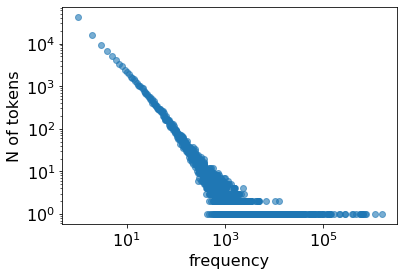

In [205]:
plt.scatter(ser.index, ser.values, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('N of tokens')

### reduce 

In [2]:
# specify freq > 10000 with filter
next(filter(lambda x: x>3, range(12)), 'err')

4

In [5]:
# specify freq > 10000 with filter
list(filter(lambda x: x>3, range(12)))

[4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
next(filter(lambda x: x>3, range(2)), 'err')

'err'

In [224]:
dict(filter(lambda x: x[1]>3, [(1,2),(6,5),(7,7)]))

{6: 5, 7: 7}

In [226]:
vocab_freq_under10000 = dict(filter(lambda x: x[1]<10000, vocab.items()))

In [228]:
len(vocab), len(vocab_freq_under10000)

(140488, 140277)

In [229]:
# remove rare words and freq words
vocab_below = dict(filter(lambda x: x[1]>10 and x[1]<10000, vocab.items()))

In [230]:
len(vocab_below)

45561

In [231]:
vocab_below

{'空': 4695,
 'とぶ': 144,
 '円盤': 149,
 'アメリカ': 556,
 'はじまっ': 131,
 '世界じゅう': 40,
 'あらわれ': 872,
 '日本': 6579,
 'ずっと': 934,
 'まえ': 2261,
 '新聞': 2841,
 'のっ': 284,
 'お話': 1161,
 'はじまる': 122,
 'ころ': 2082,
 'しきりに': 672,
 'あらわれる': 68,
 '大きな': 4583,
 'さら': 962,
 '丸い': 168,
 'ひじ': 464,
 'ょうな': 42,
 '早': 1500,
 '高い': 1944,
 '飛ん': 3493,
 'いく': 1828,
 'どこ': 8900,
 '国': 3467,
 '新': 2985,
 'がた': 3117,
 '偵察': 64,
 '飛行機': 256,
 'いや': 8814,
 'ひょっとしたら': 177,
 '宇宙': 370,
 '星': 1010,
 '地球': 237,
 'おおく': 87,
 'ばか': 1218,
 '都会': 202,
 'ながめ': 1054,
 'みんな': 2539,
 '信用': 453,
 'できる': 1152,
 '山': 9206,
 'おく': 2813,
 'いなか': 229,
 'ひとり': 4605,
 'ふたり': 2896,
 'ちがい': 1950,
 '流星': 61,
 '感じ': 4147,
 'かも': 6788,
 'しれ': 1973,
 '蜃気楼': 16,
 'しんきろう': 13,
 '現象': 1794,
 'おこる': 98,
 '山道': 139,
 '走っ': 726,
 '自動車': 1296,
 'ヘッドライト': 31,
 'うつっ': 118,
 'ちょうど': 1707,
 'いずれ': 1854,
 'ふしぎ': 1021,
 'はず': 4318,
 'なに': 3850,
 'しょう': 388,
 'ど': 8436,
 'だって': 2557,
 '着陸': 35,
 'まじめ': 327,
 '考えよ': 52,
 'しかし': 7478,
 'ほう': 6988,
 'うわさ': 568,
 

In [233]:
# get removed words list from vocab dict

# vocab dict to tuple, then filter them. this is tuple iterable. doesn't consume memory
filter_obj = filter(lambda x: x[1] <= 10 or x[1] >= 10000 ,vocab.items())

In [243]:
map_obj = map(itemgetter(0), filter_obj)

In [244]:
removed_words = list(map_obj)
removed_words

[]

## ↑ NOTE: iterable objects are consumed 

In [249]:
pred = lambda x: x[1] <= 10 or x[1] >= 10000 # predicate
sotodashi_words = list(map(itemgetter(0), filter(pred ,vocab.items())))
len(sotodashi_words)

94927

In [238]:
# 破壊的操作（英名：side effect）
l1=[3,2,1]
l1.sort()
l1

[1, 2, 3]

In [236]:
# 非破壊的操作
l2=[3,2,1]
sorted(l2)

[1, 2, 3]

In [237]:
l2

[3, 2, 1]

# NOTE: undersatand this. done

In [27]:
dict.fromkeys(['qwe','asd','zxc'], True).get

TypeError: 'builtin_function_or_method' object is not iterable

In [254]:
from itertools import filterfalse


def word_remover(words):
    implies = dict.fromkeys(words, True).get
    remove_words= lambda doc: list(filterfalse(implies, doc))
    return remove_words

In [258]:
remove_words = word_remover(sotodashi_words)

In [ ]:
# [str] -> [str] (meaning: input listof string -> output list of string)
remove_words(corpus[0])

In [260]:
len(corpus[0]),len(remove_words(corpus[0]))

(57233, 16972)

In [263]:
corpus_removed = list(map(remove_words, corpus))

In [264]:
len(corpus_removed)

1589

In [265]:
len(corpus[0])

57233

# play ground

### how to sort dict

In [52]:
d = {'f':1, 'b':6, 'c':3}
d

{'f': 1, 'b': 6, 'c': 3}

In [53]:
list(d)

['f', 'b', 'c']

In [54]:
for k in d.values():
    print(k)

1
6
3


In [55]:
list(d.items())

[('f', 1), ('b', 6), ('c', 3)]

In [58]:
sorted(d.items(), key=itemgetter(0))

[('b', 6), ('c', 3), ('f', 1)]

In [62]:
sorted(d.items(), key=lambda x: x[0])

[('b', 6), ('c', 3), ('f', 1)]

In [69]:
list_a = [[3,4,34], [6,79],[55,6,7,8]]
sorted(list_a, key=len) # 要素の長さでソート

[[6, 79], [3, 4, 34], [55, 6, 7, 8]]

In [70]:
sorted(list_a, key=sum) # 要素の合計でソート

[[3, 4, 34], [55, 6, 7, 8], [6, 79]]

In [71]:
sorted(list_a, key=lambda x: sum(x)/len(x)) # 要素の平均値でソート

[[3, 4, 34], [55, 6, 7, 8], [6, 79]]

In [59]:
sorted(d.items(), key=itemgetter(1))

[('f', 1), ('c', 3), ('b', 6)]

In [60]:
sorted(d.items(), key=itemgetter(1), reverse=True)

[('b', 6), ('c', 3), ('f', 1)]

In [61]:
dict(sorted(d.items(), key=itemgetter(1), reverse=True))

{'b': 6, 'c': 3, 'f': 1}

### load to series

In [138]:
vocab = build_vocabulary(corpus[:10])

In [139]:
import pandas as pd
# df_1 = pd.DataFrame([sorted_dict]).T
ser = pd.Series(vocab)
ser

空         133
とぶ         33
円盤        135
［＃「       211
」        1583
         ... 
プロポーズ       1
熱烈          1
実行          1
かかわら        1
退去          1
Length: 9749, dtype: int64

In [140]:
ser.value_counts()

1       4927
2       1495
3        761
4        486
5        317
        ... 
762        1
1010       1
1042       1
1706       1
1583       1
Length: 198, dtype: int64

In [141]:
ser_freq_sorted = ser.value_counts().sort_index()
ser_freq_sorted

1        4927
2        1495
3         761
4         486
5         317
         ... 
3780        1
3929        1
4365        1
6787        1
11188       1
Length: 198, dtype: int64

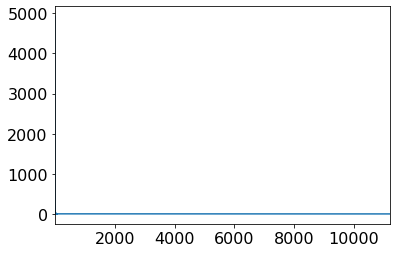

In [142]:
ser_freq_sorted.plot()

Text(0.5, 0, 'Freqency')

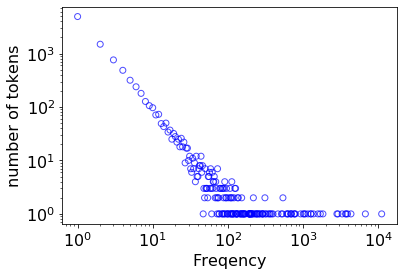

In [143]:
plt.scatter(ser_freq_sorted.index, ser_freq_sorted.values, alpha=0.7, facecolor='none', edgecolor='blue') 
plt.xscale('log')
plt.yscale('log')
plt.ylabel('number of tokens')
plt.xlabel('Freqency')

# play ground

In [36]:
dict(zip(*np.unique([1, 2, 1, 1, 2], return_counts=True)))

{1: 3, 2: 2}

In [37]:
zip(*np.unique([1, 2, 1, 1, 2], return_counts=True))

In [51]:
np.unique([1, 2, 1, 1, 2, 8, 'h'], return_counts=True)

(array(['1', '2', '8', 'h'], dtype='<U21'), array([3, 2, 1, 1]))

In [48]:
np.unique([1, 2, 1, 1, 2], return_counts=False)

array([1, 2])

In [42]:
zip(range(2), range(3))

In [52]:
dict(zip(range(2), [6,8,9]))

{0: 6, 1: 8}

In [47]:
list(zip([1,2], [3,4,5]))

[(1, 3), (2, 4)]

In [43]:
list(zip(range(2), range(3)))

[(0, 0), (1, 1)]

In [45]:
list(range(2))

[0, 1]

In [27]:
# flatten list of lists
from itertools import chain
list_a =  [[1, 2, 1, 1, 2, 8, 'h'], [1, 2, 1, 1, 2.345, 'k', 'h']] 
iter_a = chain.from_iterable(list_a)
# list(iter_a)
iter_a

In [60]:
np.random.rand(3,3)

array([[0.63151704, 0.08537664, 0.01641789],
       [0.35878093, 0.73703026, 0.18503407],
       [0.15015957, 0.80367837, 0.91675997]])

In [61]:
np.random.rand(3,3).flatten()

array([0.96212541, 0.11048726, 0.12776355, 0.6398839 , 0.55098756,
       0.32363113, 0.43788984, 0.260584  , 0.63951386])

In [69]:
# understand map
map(lambda x: x+2, [1,3,5,7])

In [70]:
list(map(lambda x: x+2, [1,3,5,7]))

[3, 5, 7, 9]

In [72]:
list(map(lambda x,y: x+y, (1,3), (5,7) ))

[6, 10]

In [73]:
list(map(lambda x,y: x+y, [1,3], [5,7,9] ))

[6, 10]

### TF-IDF interim results

In [18]:
lines = [
'リンゴを食べたら鹿が来た',
'リンゴがなっている気がある。',
'リンゴは赤いし赤くてまじで赤いと言っていた赤井の顔は赤い']

corpus = []
for line in lines:
    corpus.append(wakati(line))

print(corpus)
sorted(build_vocabulary(corpus))

[['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'], ['リンゴ', 'が', 'なっ', 'て', 'いる', '気', 'が', 'ある', '。'], ['リンゴ', 'は', '赤い', 'し', '赤く', 'て', 'まじ', 'で', '赤い', 'と', '言っ', 'て', 'い', 'た', '赤井', 'の', '顔', 'は', '赤い']]


['。',
 'ある',
 'い',
 'いる',
 'が',
 'し',
 'た',
 'たら',
 'て',
 'で',
 'と',
 'なっ',
 'の',
 'は',
 'まじ',
 'を',
 'リンゴ',
 '来',
 '気',
 '言っ',
 '赤い',
 '赤く',
 '赤井',
 '顔',
 '食べ',
 '鹿']

In [19]:
fast_tf(corpus)

(array([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 1, 1],
        [1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 3, 1,
         1, 1, 0, 0]]),
 ['。',
  'ある',
  'い',
  'いる',
  'が',
  'し',
  'た',
  'たら',
  'て',
  'で',
  'と',
  'なっ',
  'の',
  'は',
  'まじ',
  'を',
  'リンゴ',
  '来',
  '気',
  '言っ',
  '赤い',
  '赤く',
  '赤井',
  '顔',
  '食べ',
  '鹿'])

In [22]:
tf, vocab = fast_tf(corpus)
tf_bool = (tf > 0)
tf_bool.sum(axis=0)

array([1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [6]:
vocab = sorted(build_vocabulary(corpus))
countup = lambda doc: list(map(countOf, repeat(doc), vocab))
countup(corpus[0]), corpus[0], vocab

([0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1],
 ['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'],
 ['。',
  'ある',
  'い',
  'いる',
  'が',
  'し',
  'た',
  'たら',
  'て',
  'で',
  'と',
  'なっ',
  'の',
  'は',
  'まじ',
  'を',
  'リンゴ',
  '来',
  '気',
  '言っ',
  '赤い',
  '赤く',
  '赤井',
  '顔',
  '食べ',
  '鹿'])

In [75]:
countOf(corpus[0], vocab)

0

In [11]:
for (doc_elem, vocab_elem) in zip(corpus[0], vocab):
    print(doc_elem, vocab_elem, countOf(doc_elem, vocab_elem))

リンゴ 。 0
を ある 0
食べ い 0
たら いる 0
鹿 が 0
が し 0
来 た 0
た たら 0


In [12]:
for (doc, vocab_elem) in zip(repeat(corpus[0]), vocab):
    print(doc, vocab_elem, countOf(doc, vocab_elem))

['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] 。 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] ある 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] い 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] いる 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] が 1
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] し 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] た 1
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] たら 1
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] て 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] で 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] と 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] なっ 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] の 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] は 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] まじ 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] を 1
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] リンゴ 1
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] 来 1
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] 気 0
['リンゴ', 'を', '食べ', 'たら', '鹿', 'が', '来', 'た'] 言っ 0
['リンゴ', 'を',

### TF-IDF with sklearn

In [69]:
# vectorize texts by TF-IDF with sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')  # Initial settings

def calcTfidfVec(corpus):
    """
    input : array of strings
    output : vector array
    """
    vecs = vectorizer.fit_transform(corpus)
    return vecs.toarray()

In [72]:
# test
lines = [
'リンゴを食べたら鹿が来た',
'リンゴがなっている気がある。',
'リンゴは赤いし赤くてまじで赤いと言っていた赤井の顔は赤い']

corpus = []
for line in lines:
    corpus.append(wakati(line))
print(corpus)

vecs = calcTfidfVec(corpus)
pd.DataFrame(vecs, columns=vectorizer.get_feature_names())

['リンゴ を 食べ たら 鹿 が 来 た \n', 'リンゴ が なっ て いる 気 が ある 。 \n', 'リンゴ は 赤い し 赤く て まじ で 赤い と 言っ て い た 赤井 の 顔 は 赤い \n']
[[0.         0.         0.         0.29817373 0.         0.29817373
  0.39206263 0.         0.         0.         0.         0.
  0.         0.         0.39206263 0.2315585  0.39206263 0.
  0.         0.         0.         0.         0.         0.39206263
  0.39206263]
 [0.37162591 0.         0.37162591 0.56526217 0.         0.
  0.         0.28263108 0.         0.         0.37162591 0.
  0.         0.         0.         0.21948825 0.         0.37162591
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.19521413 0.         0.         0.19521413 0.14846538
  0.         0.29693076 0.19521413 0.19521413 0.         0.19521413
  0.39042827 0.19521413 0.         0.11529661 0.         0.
  0.19521413 0.5856424  0.19521413 0.19521413 0.19521413 0.
  0.        ]]
['ある', 'い', 'いる', 'が', 'し', 'た', 'たら', 'て', 'で', 'と', 'なっ', 'の', 'は', 'まじ', 'を', 'リンゴ', 

,ある,い,いる,が,し,た,たら,て,で,と,...,リンゴ,来,気,言っ,赤い,赤く,赤井,顔,食べ,鹿
0,0.000000,0.000000,0.000000,0.298174,0.000000,0.298174,0.392063,0.000000,0.000000,0.000000,...,0.231559,0.392063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392063,0.392063
1,0.371626,0.000000,0.371626,0.565262,0.000000,0.000000,0.000000,0.282631,0.000000,0.000000,...,0.219488,0.000000,0.371626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.195214,0.000000,0.000000,0.195214,0.148465,0.000000,0.296931,0.195214,0.195214,...,0.115297,0.000000,0.000000,0.195214,0.585642,0.195214,0.195214,0.195214,0.000000,0.000000
